<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:RoyalBlue">Manhattan Real Estate Sales Analysis</span> </h1>
<hr>
<h3 style="font-size:22px; text-align:center; margin-bottom:30px;"><span style="color:LightGrey">Xiaomin Xie</h3>

- Manhattan Rolling Sales.  All Sales From Feb 23 - Jan 24
- For sales prior to the Final Roll, Neighborhood Name and Descriptive Data reflect the most recent Final Roll. Sales after the Final Roll, Neighborhood Name and Descriptive Data reflect current data
- Building Class Category is based on Building Class at Time of Sale.
- Condominium and cooperative sales are on the unit level and understood to have a count of one.

# 0. IMPORT PACKAGES

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [89]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Geo Data
from geopy.geocoders import Nominatim

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

# kmeans
from sklearn.cluster import KMeans

# 1. PROJECT PLANNING AND QUESTIONS TO ANSWER
* Sales analysis based on neighborhoods/zip.
* Does tax code affect sales price?
* Does building code affect sales price?
* Clustering analysis
* Price/sqft ranked by neighborhood
* Sales activity by neighborhood by time in gif rendition

# 2. EXPLORATORY DATA ANALYSIS

In [4]:
df = pd.read_excel('rollingsales_manhattan_feb23_jan24.xlsx', header=4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16691 entries, 0 to 16690
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         16691 non-null  int64         
 1   NEIGHBORHOOD                    16691 non-null  object        
 2   BUILDING CLASS CATEGORY         16691 non-null  object        
 3   TAX CLASS AT PRESENT            16676 non-null  object        
 4   BLOCK                           16691 non-null  int64         
 5   LOT                             16691 non-null  int64         
 6   EASEMENT                        0 non-null      float64       
 7   BUILDING CLASS AT PRESENT       16676 non-null  object        
 8   ADDRESS                         16691 non-null  object        
 9   APARTMENT NUMBER                7702 non-null   object        
 10  ZIP CODE                        16691 non-null  int64         
 11  RE

In [6]:
df.shape

(16691, 21)

In [6]:
df.drop(['BOROUGH'], axis=1, inplace=True)

In [7]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [8]:
df.head()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,386,7,NaN,S2,49 AVENUE B,NaN,10009,2.0,1.0,3.0,1725.0,2304.0,1880.0,1,S2,0,2023-11-02
1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,386,8,NaN,S2,51 AVENUE B,NaN,10009,2.0,1.0,3.0,1530.0,1920.0,1880.0,1,S2,0,2023-11-02
2,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,376,25,NaN,C3,266 EAST 7TH,NaN,10009,4.0,0.0,4.0,2059.0,3764.0,1900.0,2,C3,0,2023-11-09
3,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,41,NaN,C4,"745 EAST 6TH STREET, 3D",NaN,10009,28.0,0.0,28.0,4542.0,18254.0,1900.0,2,C4,625000,2023-12-13
4,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,41,NaN,C4,"745 EAST 6TH STREET, 4B",NaN,10009,28.0,0.0,28.0,4542.0,18254.0,1900.0,2,C4,565000,2023-12-19


In [25]:
df.dtypes

NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
EASEMENT                                 float64
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                   int64
RESIDENTIAL UNITS                        float64
COMMERCIAL UNITS                         float64
TOTAL UNITS                              float64
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                               float64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                                 int64
SALE DATE                         datetime64[ns]
dtype: object

In [59]:
df.describe()

,BLOCK,LOT,EASEMENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,16691.000000,16691.000000,0.0,16691.000000,8640.000000,2145.000000,9249.000000,1536.000000,1.536000e+03,14972.000000,16691.000000,1.669100e+04
mean,1110.647954,728.520400,NaN,10032.471152,8.738426,2.610723,8.768516,7236.856771,6.721972e+04,1954.529522,2.096819,2.870081e+06
std,542.833880,868.583933,NaN,44.578659,42.243728,16.516358,41.883029,26792.571978,1.419733e+05,37.915226,0.486211,1.615731e+07
min,11.000000,1.000000,NaN,10001.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1800.000000,1.000000,0.000000e+00
25%,748.000000,29.000000,NaN,10013.000000,1.000000,0.000000,1.000000,1885.500000,4.317250e+03,1924.000000,2.000000,3.550000e+05
50%,1171.000000,1002.000000,NaN,10022.000000,1.000000,1.000000,1.000000,2514.000000,8.769500e+03,1956.000000,2.000000,9.250000e+05
75%,1470.000000,1193.000000,NaN,10028.000000,1.000000,1.000000,1.000000,7532.000000,3.870800e+04,1986.000000,2.000000,2.182008e+06
max,2250.000000,9079.000000,NaN,10463.000000,538.000000,390.000000,550.000000,738000.000000,2.400000e+06,2023.000000,4.000000,9.630000e+08


In [9]:
# split dataframe for numerical and categorical analysis
df_cat =df[['NEIGHBORHOOD','BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT','LOT','EASEMENT','BUILDING CLASS AT PRESENT','TAX CLASS AT TIME OF SALE','BUILDING CLASS AT TIME OF SALE','ADDRESS','APARTMENT NUMBER','ZIP CODE',]]
df_num = df[['RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT','SALE PRICE','SALE DATE']]

## 2.1 Numerical Columns

<Axes: xlabel='SALE PRICE', ylabel='Count'>

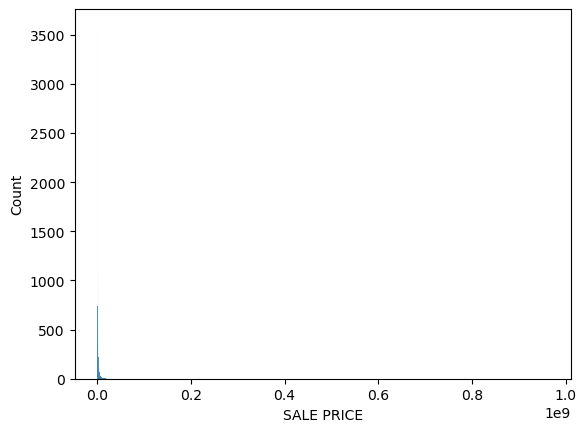

In [64]:
sns.histplot(df['SALE PRICE'])

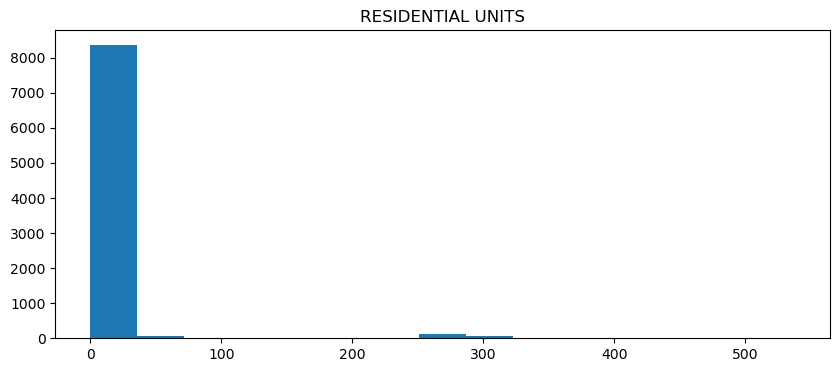

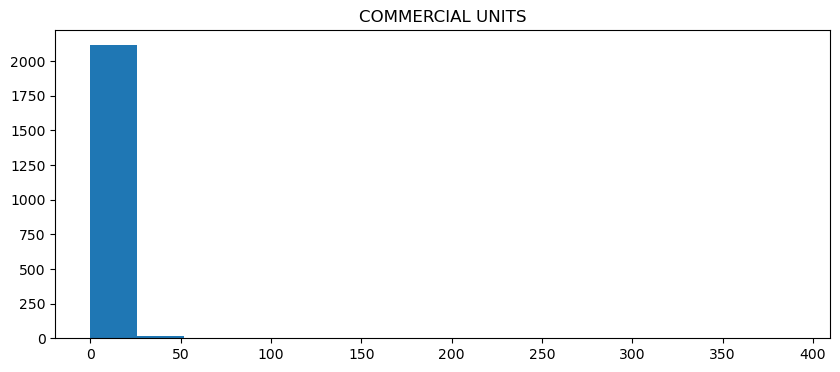

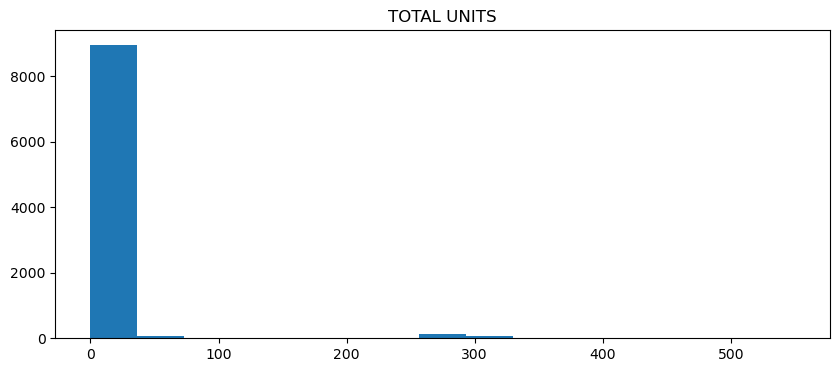

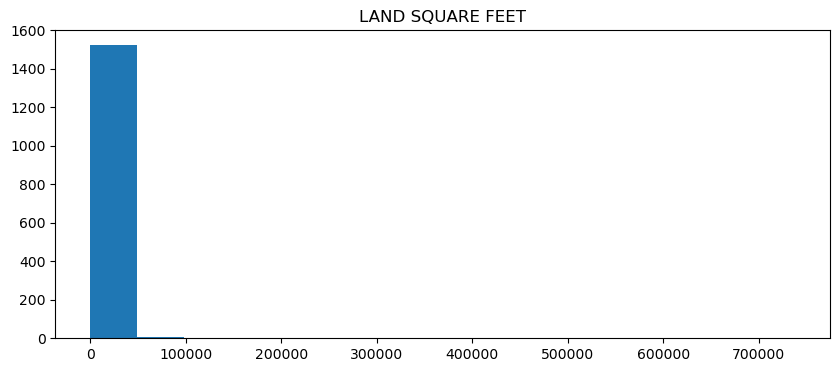

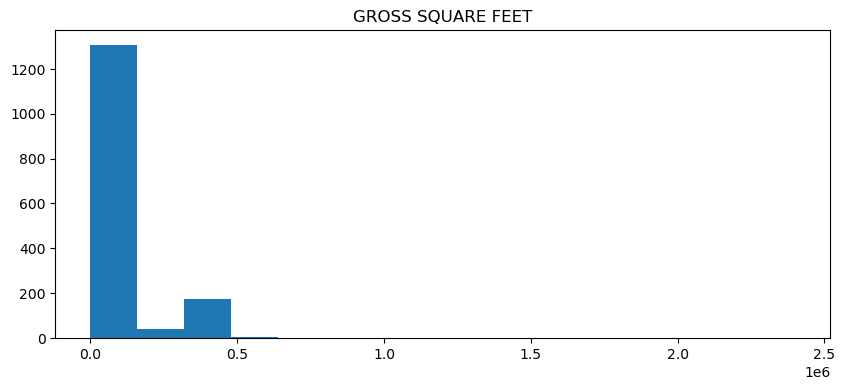

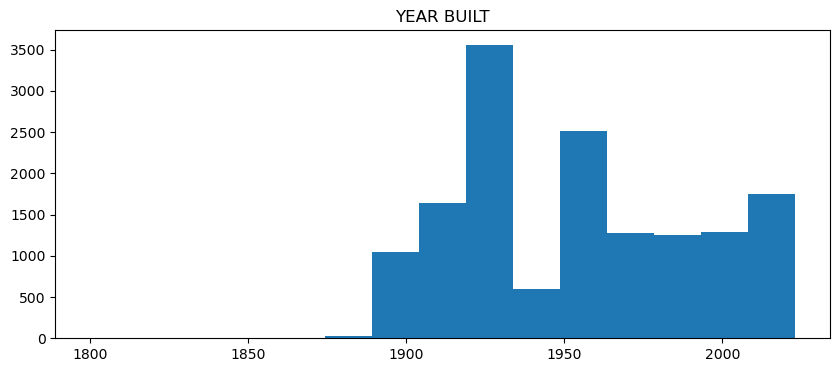

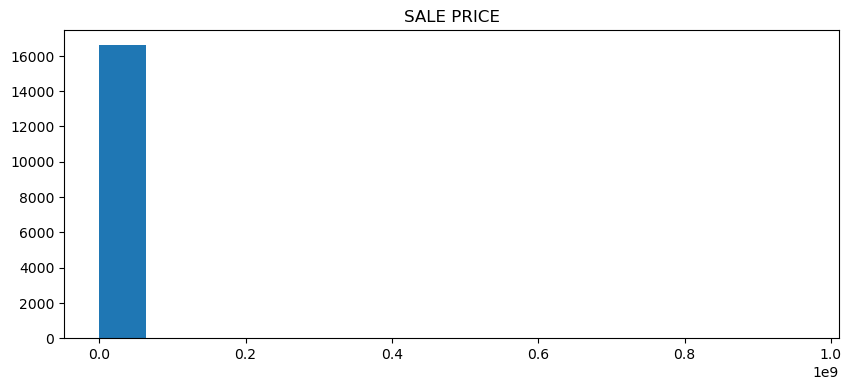

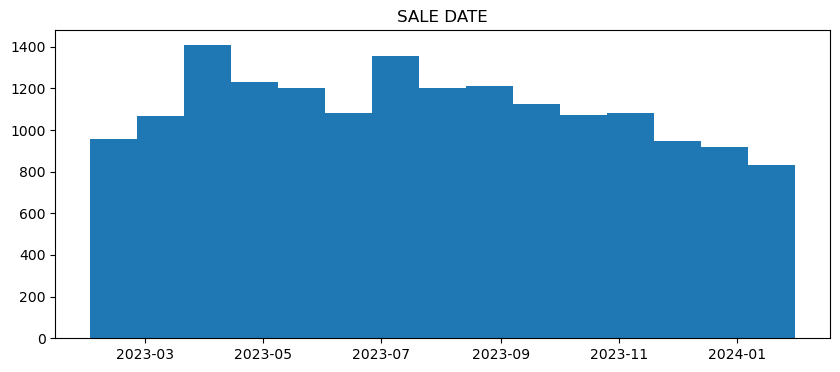

In [11]:
for i in df_num.columns:
    plt.figure(figsize=(10,4))
    plt.hist(df_num[i], bins=15)
    plt.title(i)
    plt.show()

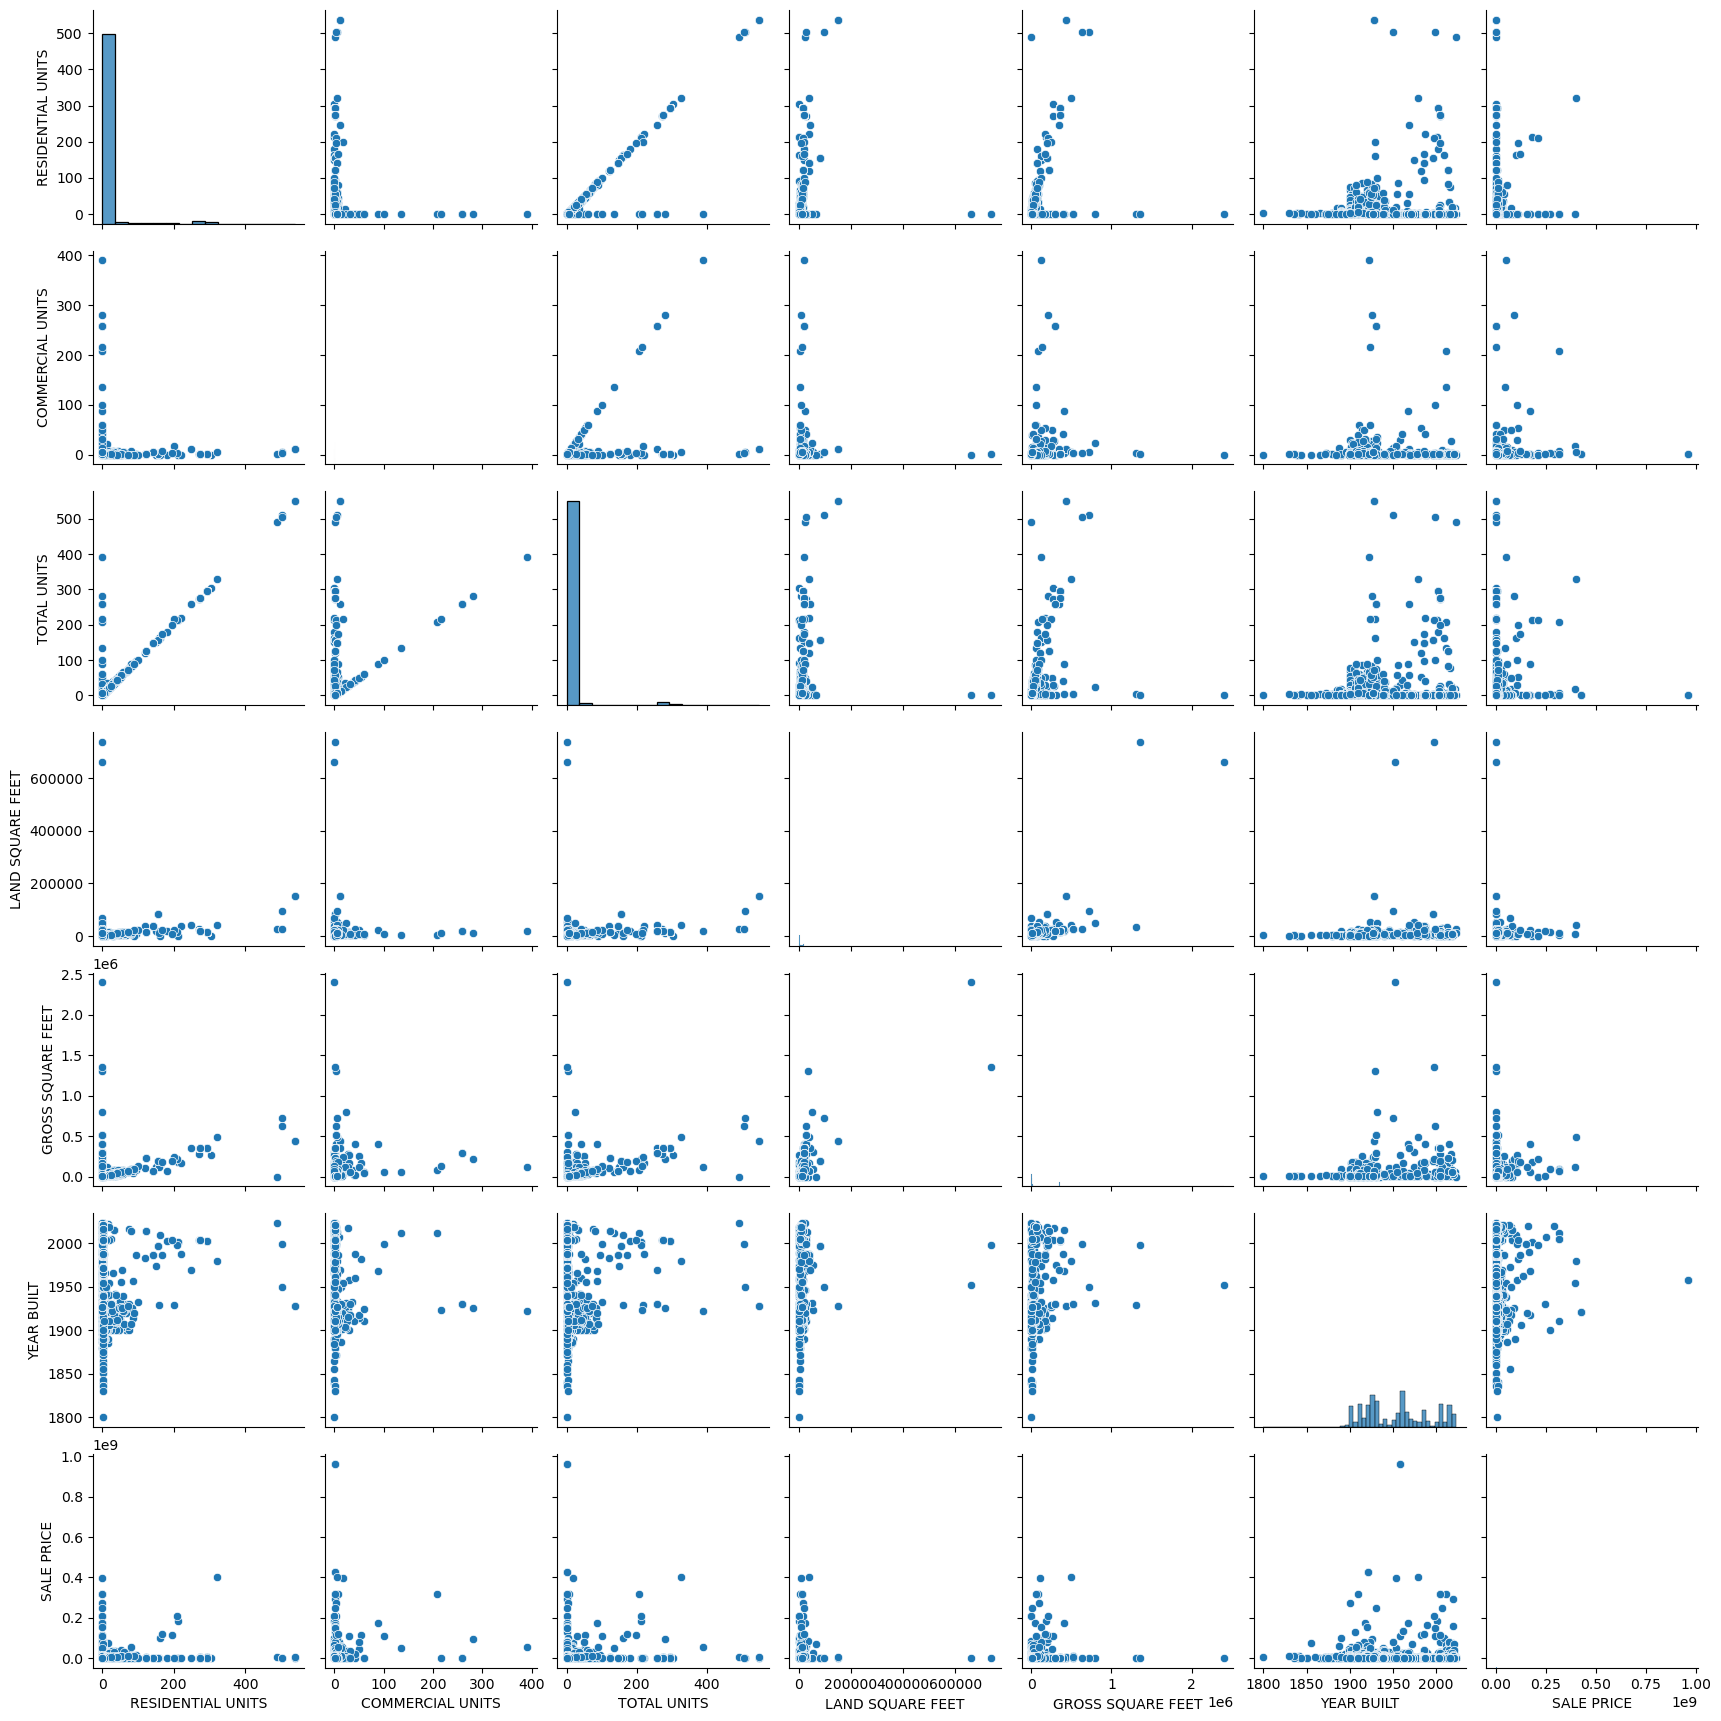

In [7]:
sns.pairplot(df_num)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'RESIDENTIAL UNITS'),
  Text(1.5, 0, 'COMMERCIAL UNITS'),
  Text(2.5, 0, 'TOTAL UNITS'),
  Text(3.5, 0, 'LAND SQUARE FEET'),
  Text(4.5, 0, 'GROSS SQUARE FEET'),
  Text(5.5, 0, 'YEAR BUILT'),
  Text(6.5, 0, 'SALE PRICE')])

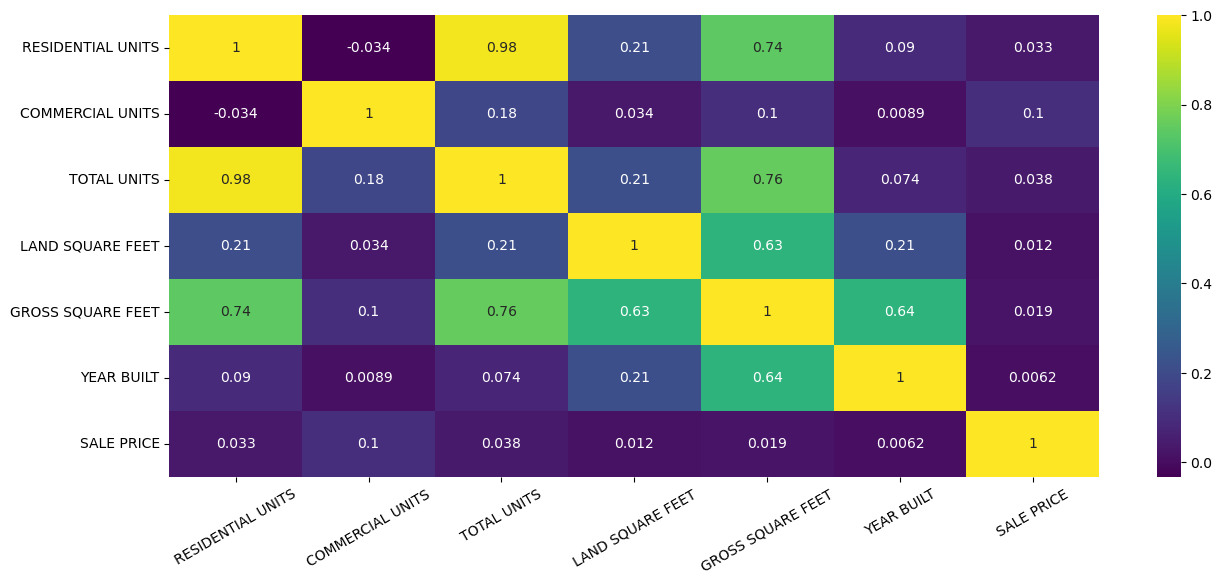

In [10]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(df_num.corr(numeric_only=True), annot=True, cmap='viridis')
plt.xticks(rotation=30)

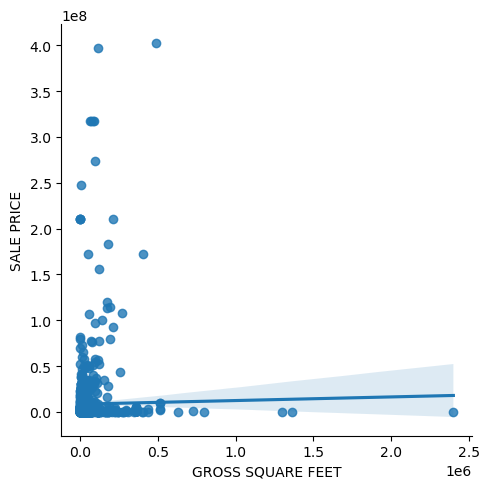

In [57]:
# gross square feet alone is not a good predictor for sales price
sns.lmplot(x='GROSS SQUARE FEET',y='SALE PRICE',data=df_num)

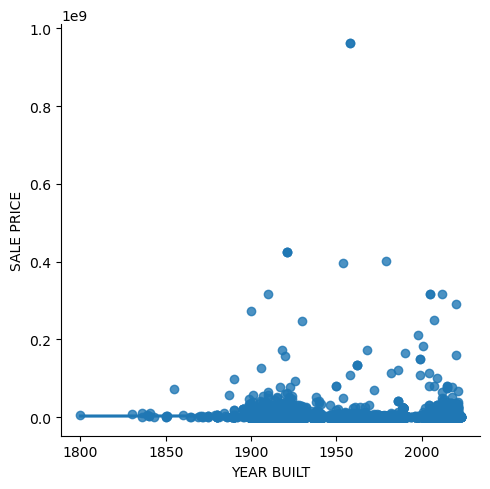

In [58]:
# what about year built?
sns.lmplot(x='YEAR BUILT',y='SALE PRICE',data=df_num)

## 2.2 Categorical Columns

<Axes: xlabel='SALE PRICE', ylabel='NEIGHBORHOOD'>

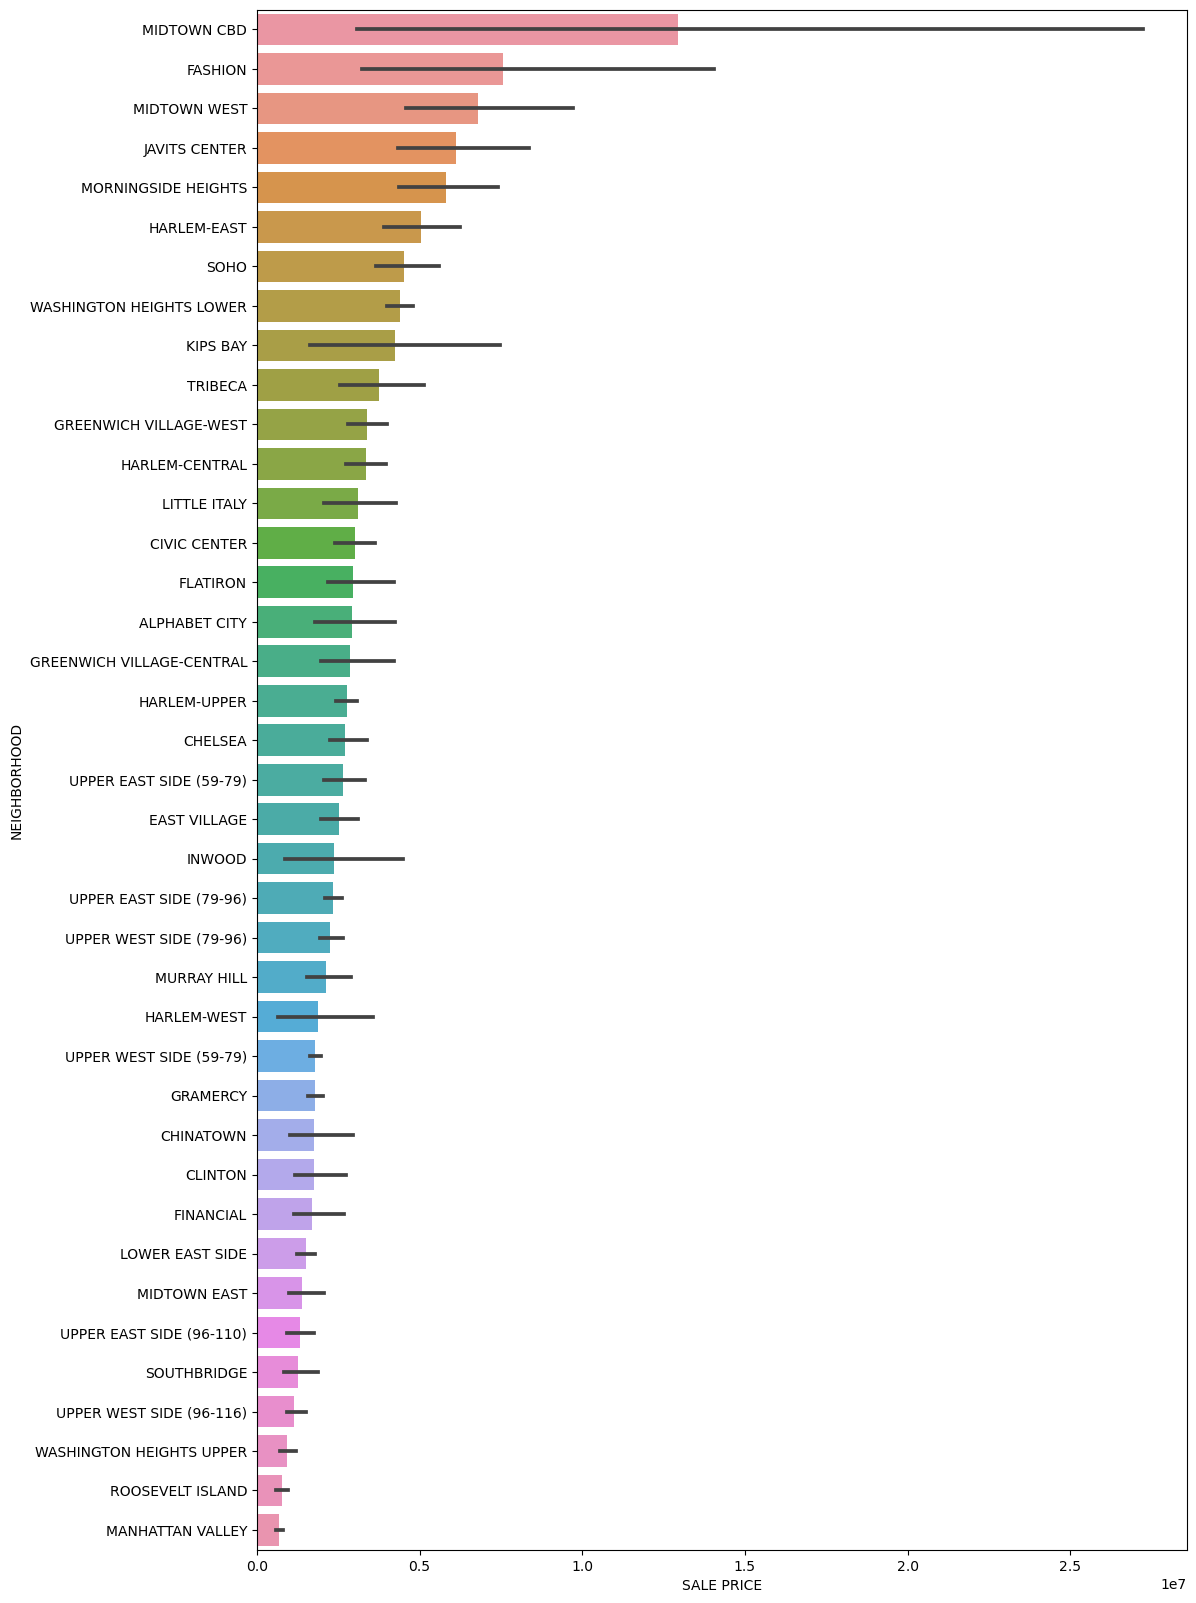

In [34]:
# result is unexpected probably due to large number of commercial units in the dataset
fig, ax = plt.subplots(figsize=(12, 20))
price_order = df.groupby(['NEIGHBORHOOD'])['SALE PRICE'].mean().sort_values(ascending=False).index
sns.barplot(x='SALE PRICE', y='NEIGHBORHOOD', data=df, order=price_order)

<Axes: xlabel='SALE PRICE', ylabel='NEIGHBORHOOD'>

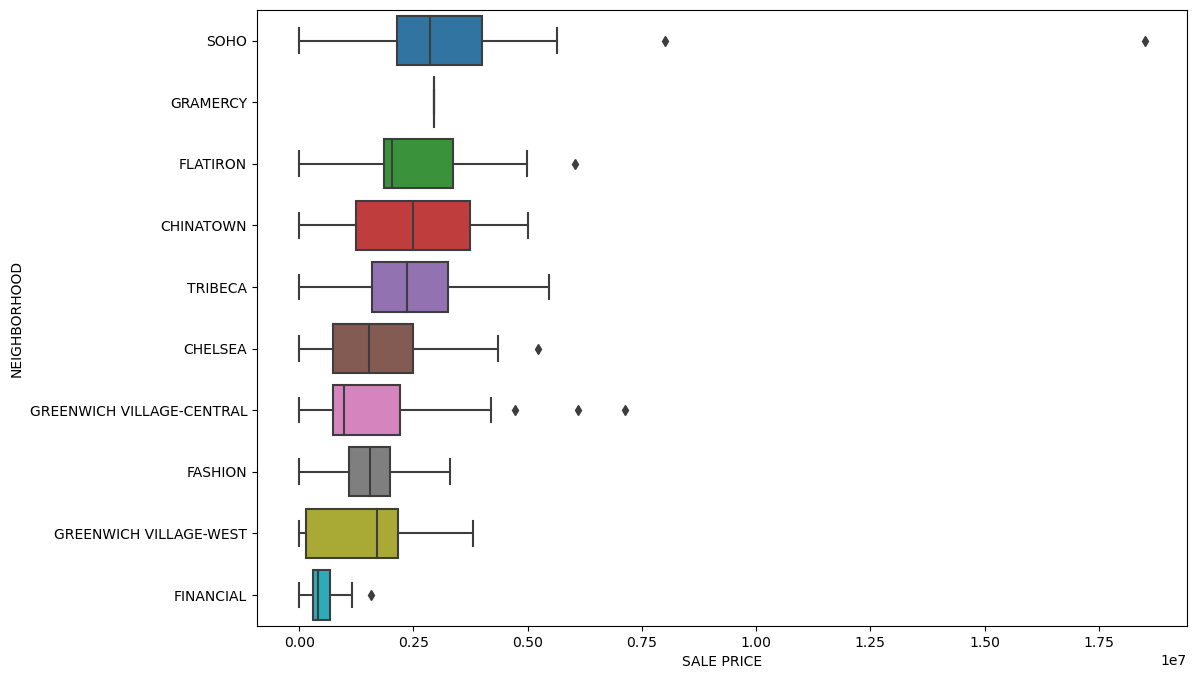

In [42]:
# what about only looking at BUILDING CLASS D0 (ELEVATOR CO-OP; CONVERSION FROM LOFT/WAREHOUSE): 
fig, ax = plt.subplots(figsize=(12, 8))
df_d0 = df[df['BUILDING CLASS AT TIME OF SALE']=='D0']
price_order = df_d0.groupby(['NEIGHBORHOOD'])['SALE PRICE'].mean().sort_values(ascending=False).index
sns.boxplot(x='SALE PRICE', y='NEIGHBORHOOD', data=df_d0, order=price_order)

<Axes: xlabel='SALE PRICE', ylabel='NEIGHBORHOOD'>

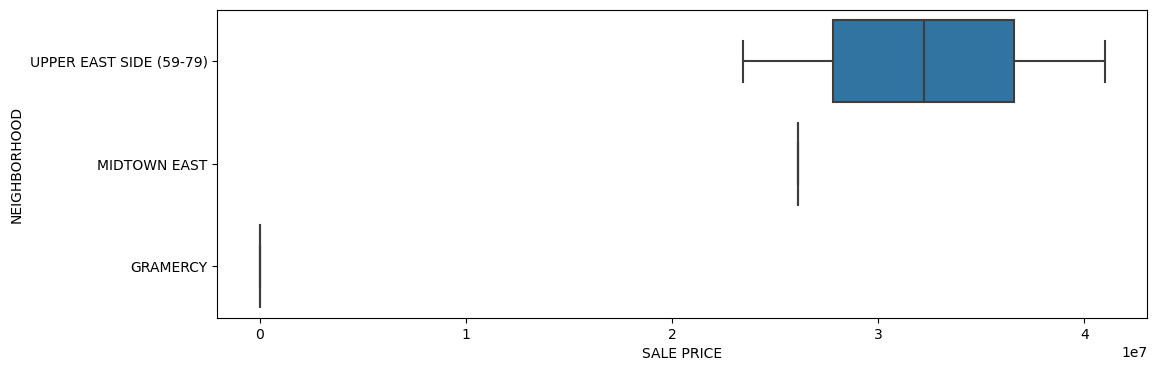

In [49]:
# what about only looking at BUILDING CLASS A7 (MANSION TYPE OR TOWN HOUSE): 
fig, ax = plt.subplots(figsize=(12, 4))
df_a7 = df[df['BUILDING CLASS AT TIME OF SALE']=='A7']
price_order = df_a7.groupby(['NEIGHBORHOOD'])['SALE PRICE'].mean().sort_values(ascending=False).index
sns.boxplot(x='SALE PRICE', y='NEIGHBORHOOD', data=df_a7, order=price_order)

# UNUSED BACKUP CODE

In [12]:
geolocator = Nominatim(user_agent="manhattan_sales")

In [13]:
geolocator.geocode("114 BENNETT AVENUE, Manhattan, NY").raw

{'place_id': 371393931,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 275098511,
 'lat': '40.853938',
 'lon': '-73.9351355491124',
 'class': 'building',
 'type': 'apartments',
 'place_rank': 30,
 'importance': 9.99999999995449e-06,
 'addresstype': 'building',
 'name': '',
 'display_name': '114, Bennett Avenue, Hudson Heights, Manhattan Community Board 12, Manhattan, New York County, City of New York, New York, 10033, United States',
 'boundingbox': ['40.8538610', '40.8540425', '-73.9352626', '-73.9350085']}

In [35]:
df_building_code = pd.read_excel('nyc_building_code.xlsx', header=0)
df_building_code

,Building Code,Description
0,A,ONE FAMILY DWELLINGS
1,A0,CAPE COD
2,A1,TWO STORIES - DETACHED SM OR MID
3,A2,ONE STORY - PERMANENT LIVING QUARTER
4,A3,LARGE SUBURBAN RESIDENCE
5,A4,CITY RESIDENCE ONE FAMILY
6,A5,ONE FAMILY ATTACHED OR SEMI-DETACHED
7,A6,SUMMER COTTAGE
8,A7,MANSION TYPE OR TOWN HOUSE
9,A8,BUNGALOW COLONY - COOPERATIVELY OWNED LAND


In [34]:
df_new = pd.merge(df, df_building_code, how='left', left_on='BUILDING CLASS AT PRESENT', right_on='Building Code')

In [35]:
df_new.rename(columns={'Description': 'Present Building Code'}, inplace=True) 

In [36]:
df_new.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Building Code,Present Building Code
0,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,386,7,NaN,S2,49 AVENUE B,NaN,10009,2.0,1.0,3.0,1725.0,2304.0,1880.0,1,S2,0,2023-11-02,S2,PRIMARILY 2 FAMILY WITH 1 STORE OR OFFICE
1,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,386,8,NaN,S2,51 AVENUE B,NaN,10009,2.0,1.0,3.0,1530.0,1920.0,1880.0,1,S2,0,2023-11-02,S2,PRIMARILY 2 FAMILY WITH 1 STORE OR OFFICE
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,376,25,NaN,C3,266 EAST 7TH,NaN,10009,4.0,0.0,4.0,2059.0,3764.0,1900.0,2,C3,0,2023-11-09,C3,FOUR FAMILIES
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,41,NaN,C4,"745 EAST 6TH STREET, 3D",NaN,10009,28.0,0.0,28.0,4542.0,18254.0,1900.0,2,C4,625000,2023-12-13,C4,OLD LAW TENEMENT
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,41,NaN,C4,"745 EAST 6TH STREET, 4B",NaN,10009,28.0,0.0,28.0,4542.0,18254.0,1900.0,2,C4,565000,2023-12-19,C4,OLD LAW TENEMENT


In [37]:
df_new = pd.merge(df_new, df_building_code, how='left', left_on='BUILDING CLASS AT TIME OF SALE', right_on='Building Code')

In [38]:
df_new.rename(columns={'Description': 'Sale Building Code'}, inplace=True) 

In [39]:
df_new.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Building Code_x,Present Building Code,Building Code_y,Sale Building Code
0,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,386,7,NaN,S2,49 AVENUE B,NaN,10009,2.0,1.0,3.0,1725.0,2304.0,1880.0,1,S2,0,2023-11-02,S2,PRIMARILY 2 FAMILY WITH 1 STORE OR OFFICE,S2,PRIMARILY 2 FAMILY WITH 1 STORE OR OFFICE
1,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,386,8,NaN,S2,51 AVENUE B,NaN,10009,2.0,1.0,3.0,1530.0,1920.0,1880.0,1,S2,0,2023-11-02,S2,PRIMARILY 2 FAMILY WITH 1 STORE OR OFFICE,S2,PRIMARILY 2 FAMILY WITH 1 STORE OR OFFICE
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,376,25,NaN,C3,266 EAST 7TH,NaN,10009,4.0,0.0,4.0,2059.0,3764.0,1900.0,2,C3,0,2023-11-09,C3,FOUR FAMILIES,C3,FOUR FAMILIES
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,41,NaN,C4,"745 EAST 6TH STREET, 3D",NaN,10009,28.0,0.0,28.0,4542.0,18254.0,1900.0,2,C4,625000,2023-12-13,C4,OLD LAW TENEMENT,C4,OLD LAW TENEMENT
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,41,NaN,C4,"745 EAST 6TH STREET, 4B",NaN,10009,28.0,0.0,28.0,4542.0,18254.0,1900.0,2,C4,565000,2023-12-19,C4,OLD LAW TENEMENT,C4,OLD LAW TENEMENT


In [42]:
df_new.drop(['Building Code_x', 'Building Code_y'], axis=1, inplace=True)

In [44]:
df_new.drop(['BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE'], axis=1, inplace=True)

In [45]:
df_new.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Present Building Code,Sale Building Code
0,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,386,7,NaN,49 AVENUE B,NaN,10009,2.0,1.0,3.0,1725.0,2304.0,1880.0,1,0,2023-11-02,PRIMARILY 2 FAMILY WITH 1 STORE OR OFFICE,PRIMARILY 2 FAMILY WITH 1 STORE OR OFFICE
1,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,386,8,NaN,51 AVENUE B,NaN,10009,2.0,1.0,3.0,1530.0,1920.0,1880.0,1,0,2023-11-02,PRIMARILY 2 FAMILY WITH 1 STORE OR OFFICE,PRIMARILY 2 FAMILY WITH 1 STORE OR OFFICE
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,376,25,NaN,266 EAST 7TH,NaN,10009,4.0,0.0,4.0,2059.0,3764.0,1900.0,2,0,2023-11-09,FOUR FAMILIES,FOUR FAMILIES
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,41,NaN,"745 EAST 6TH STREET, 3D",NaN,10009,28.0,0.0,28.0,4542.0,18254.0,1900.0,2,625000,2023-12-13,OLD LAW TENEMENT,OLD LAW TENEMENT
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,41,NaN,"745 EAST 6TH STREET, 4B",NaN,10009,28.0,0.0,28.0,4542.0,18254.0,1900.0,2,565000,2023-12-19,OLD LAW TENEMENT,OLD LAW TENEMENT
